<a href="https://colab.research.google.com/github/anomishra/Logistic_Regression_Titanic_dataset/blob/master/Titanic_dataset_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install tflearn
!pip install git+https://github.com/tflearn/tflearn.git
!pip install --upgrade tensorflow

  Cloning https://github.com/tflearn/tflearn.git to /tmp/pip-req-build-nb4_u_w5
  Running setup.py bdist_wheel for tflearn ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-bzgibit_/wheels/5a/18/2a/c62b9937b37223da935fb6b2965f02fbc45691e460a08b91b4
Successfully built tflearn
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.12.0)


In [0]:
import tflearn
import tensorflow as tf
import numpy as np

Data preprocess:

Deleting name column in the dataframe as it is not important.
Also, neural network use only numerical values (float) hence, replacing values of sex: female = 1, male = 0.

For columns use axis = 1 and for row use axis = 0

In [154]:


from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv') #download the dataset

from tflearn.data_utils import load_csv
import pandas as pd
data = pd.read_csv('titanic_dataset.csv')
data = data.drop(['name','ticket'], axis = 1) 
#for columns use axis = 1 and for row use axis = 0

#Another form to load
#data, labels = load_csv('titanic_dataset.csv', target_column=0, categorical_labels=True, n_classes=2)
#data = pd.DataFrame(data = data, columns = ["label", "name", "sex", "age", "siblings", "parch", "ticket", "fare"])
#data

#row_count = data.shape[0]

#replacing values of sex: female = 1, male = 0 
data['sex'].replace('female', 1.,inplace=True)        
data['sex'].replace('male', 0.,inplace=True)
data
#data.info()
#data.describe()


,survived,pclass,sex,age,sibsp,parch,fare
0,1,1,1.0,29.0000,0,0,211.3375
1,1,1,0.0,0.9167,1,2,151.5500
2,0,1,1.0,2.0000,1,2,151.5500
3,0,1,0.0,30.0000,1,2,151.5500
4,0,1,1.0,25.0000,1,2,151.5500
5,1,1,0.0,48.0000,0,0,26.5500
6,1,1,1.0,63.0000,1,0,77.9583
7,0,1,0.0,39.0000,0,0,0.0000
8,1,1,1.0,53.0000,2,0,51.4792
9,0,1,0.0,71.0000,0,0,49.5042


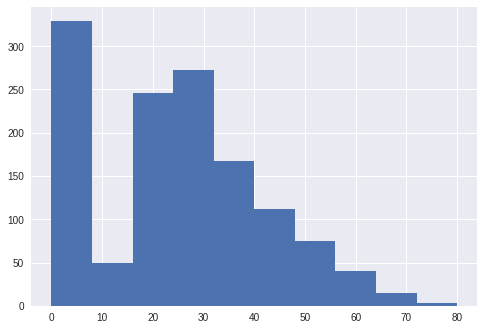

In [155]:
import pylab as P
data['age'].hist()
P.show()

In [0]:
#Checking any missing values in dataset
#data.shape
#data.isnull()
#data.isnull().values.any()
#data.isnull().sum()
#data.isnull().sum().sum()


X_data = data.drop('survived', axis = 1) 

#call the entire column
#data.loc[:,'Column_name']

Y_data = pd.get_dummies(data.loc[:,'survived'])
#Y_data
#changing the datasets into arrays
#X_data = X_data.as_matrix()
#Y_data = Y_data.as_matrix()
X_data = np.array(X_data)
Y_data = np.array(Y_data)
Y_data = Y_data.astype(float) 
#X_data
#Y_data
tf.reset_default_graph()

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [0]:

#no need here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
#X_train
#X_test
#y_train
#y_test

Now building a neural network using tflearn module.

*  We are having 6 features in data.
*  We will run it for 10 epochs (the network will see all data 10 times) with a batch size of 16.



In [160]:
net = tflearn.input_data(shape=[None, 6])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

# Define model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(X_data, Y_data, n_epoch=10, batch_size=16, show_metric=True)


Training Step: 819  | total loss: 0.44933 | time: 0.330s
| Adam | epoch: 010 | loss: 0.44933 - acc: 0.8134 -- iter: 1296/1309
Training Step: 820  | total loss: 0.42872 | time: 0.333s
| Adam | epoch: 010 | loss: 0.42872 - acc: 0.8258 -- iter: 1309/1309
--


In [0]:
#  some data for DiCaprio and Winslet
dicaprio = {'pclass':3,'name':'Jack Dawson', 'sex':0, 'age':19, 'siblings': 0, 'parch':0, 'ticket':'N/A', 'fare': 5.0000}
winslet = {'pclass':1,'name':'Rose DeWitt Bukater', 'sex':1, 'age':17, 'siblings': 1, 'parch':2, 'ticket':'N/A', 'fare': 100.0000}

#from above data set needed are in order
# [ pclass, sex, age,siblings, parch, fare ]
# Preprocess data
dicaprio = np.array([3,0,19,0,0,5.0000])
winslet = np.array([1,1,17,1,2,100.0000])
#dicaprio
#winslet


You can arrange or fetch from any datatype. Make sure that you are processing it into it's above designed form. I;m directly taking the data into numpy array form. 
Also, I provided a dictionary type for single data. One can automate it to process into numpy array. (*Hint, be sure that while processing the data is in ordered pair)

In [175]:
# Predict surviving chances (class 1 results)
pred = model.predict([dicaprio,winslet])
print("DiCaprio Surviving Rate:", pred[0][1])
print("Winslet Surviving Rate:", pred[1][1])

DiCaprio Surviving Rate: 0.110949695
Winslet Surviving Rate: 0.8660004
